In [23]:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as srn
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
import plotly.io as pio

In [24]:
df = pd.read_csv("Book(VENDAS).csv", sep=';', encoding='utf-8')
df.head()

,ISBN,DATA,N-NF,AUTOR,TITULO,Editora,EXEMPLARES,PREÇO VENDA,TOTAL,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.788571e+12,05/06/2024,1.0,ALICE KRIEG-PLANQUE,ANALISAR DISCURSOS INSTITUCIONAIS,EDUFU,1.0,"R$ 50,00","R$ 50,00",NaN
2,9.786558e+12,09/07/2024,2.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,2.0,"R$ 30,00","R$ 60,00",NaN
3,9.786558e+12,06/06/2024,2.0,RAQUEL DISCINI DE CAMPOS,A EDUCACAO ENTRE A ETICA E A ESTETICA: OS ALBU...,EDUFU,1.0,"R$ 50,00","R$ 50,00",NaN
4,9.786558e+12,09/07/2024,3.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,1.0,"R$ 30,00","R$ 30,00",NaN


In [25]:
print(df.shape)
print(df.columns)

(799, 10)
Index(['ISBN', 'DATA', 'N-NF', 'AUTOR', 'TITULO', 'Editora', 'EXEMPLARES',
       ' PREÇO VENDA ', 'TOTAL', 'Unnamed: 9'],
      dtype='object')


In [26]:
df.isna().sum()

ISBN             259
DATA             259
N-NF             259
AUTOR            259
TITULO           259
Editora          259
EXEMPLARES       259
 PREÇO VENDA     259
TOTAL            259
Unnamed: 9       799
dtype: int64

In [27]:
df.drop(df.columns[9],axis=1, inplace=True)
df.head()

,ISBN,DATA,N-NF,AUTOR,TITULO,Editora,EXEMPLARES,PREÇO VENDA,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.788571e+12,05/06/2024,1.0,ALICE KRIEG-PLANQUE,ANALISAR DISCURSOS INSTITUCIONAIS,EDUFU,1.0,"R$ 50,00","R$ 50,00"
2,9.786558e+12,09/07/2024,2.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,2.0,"R$ 30,00","R$ 60,00"
3,9.786558e+12,06/06/2024,2.0,RAQUEL DISCINI DE CAMPOS,A EDUCACAO ENTRE A ETICA E A ESTETICA: OS ALBU...,EDUFU,1.0,"R$ 50,00","R$ 50,00"
4,9.786558e+12,09/07/2024,3.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,1.0,"R$ 30,00","R$ 30,00"


In [28]:
df.dropna(inplace=True)
df.isna().sum()

ISBN             0
DATA             0
N-NF             0
AUTOR            0
TITULO           0
Editora          0
EXEMPLARES       0
 PREÇO VENDA     0
TOTAL            0
dtype: int64

In [29]:
df.drop(df.columns[3],axis=1, inplace=True)
df.drop(df.columns[3],axis=1, inplace=True)



In [30]:
df.head()

,ISBN,DATA,N-NF,Editora,EXEMPLARES,PREÇO VENDA,TOTAL
1,9.788571e+12,05/06/2024,1.0,EDUFU,1.0,"R$ 50,00","R$ 50,00"
2,9.786558e+12,09/07/2024,2.0,EDUFU,2.0,"R$ 30,00","R$ 60,00"
3,9.786558e+12,06/06/2024,2.0,EDUFU,1.0,"R$ 50,00","R$ 50,00"
4,9.786558e+12,09/07/2024,3.0,EDUFU,1.0,"R$ 30,00","R$ 30,00"
5,9.786588e+12,01/07/2024,4.0,EDUFU,1.0,"R$ 56,67","R$ 56,67"


In [31]:
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True)



<Axes: xlabel='DATA'>

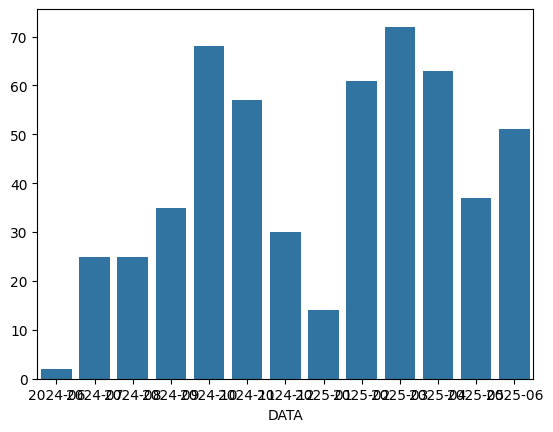

In [32]:
g = df.groupby(df["DATA"].dt.to_period("M")).size().sort_index()
srn.barplot(g)

In [33]:
g1 = df.groupby(df["Editora"]).size()
g1

Editora
EDUFU     336
MADAMU      3
PONTES      8
UFMG       54
UNESP     139
dtype: int64

<Axes: xlabel='Editora'>

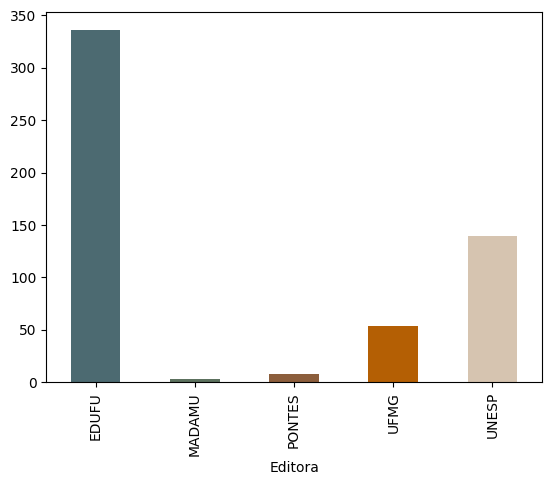

In [34]:
g1.plot.bar(color= ['#4C6A71', '#5C715E', '#8C5E3C', '#B45F04', '#D6C4B0'])

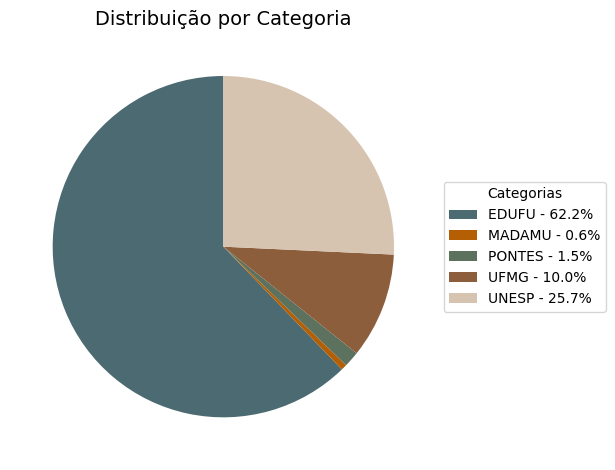

In [35]:

# Total geral
total = g1.sum()

# Criar a legenda direto da Series
legenda = [f"{categoria} - {valor/total:.1%}" for categoria, valor in g1.items()]

# Plot
fig, ax = plt.subplots()
ax.pie(g1.values, labels=None, colors=['#4C6A71', '#B45F04', '#5C715E', '#8C5E3C', '#D6C4B0'], startangle=90)

# Legenda lateral com nomes e porcentagens
ax.legend(legenda, loc='center left', bbox_to_anchor=(1, 0.5), title="Categorias")

# Título bonitinho
ax.set_title("Distribuição por Categoria", fontsize=14)

plt.tight_layout()
plt.show()


In [36]:

df["TOTAL"].replace(r"[^0-9]","",regex=True, inplace=True)

C:\Users\DEINER\AppData\Local\Temp\ipykernel_4404\2992839042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TOTAL"].replace(r"[^0-9]","",regex=True, inplace=True)


In [37]:
df["TOTAL"] = df["TOTAL"].astype(float)

In [38]:
df["TOTAL"] = df["TOTAL"]/100

In [39]:
df

,ISBN,DATA,N-NF,Editora,EXEMPLARES,PREÇO VENDA,TOTAL
1,9.788571e+12,2024-06-05,1.0,EDUFU,1.0,"R$ 50,00",50.00
2,9.786558e+12,2024-07-09,2.0,EDUFU,2.0,"R$ 30,00",60.00
3,9.786558e+12,2024-06-06,2.0,EDUFU,1.0,"R$ 50,00",50.00
4,9.786558e+12,2024-07-09,3.0,EDUFU,1.0,"R$ 30,00",30.00
5,9.786588e+12,2024-07-01,4.0,EDUFU,1.0,"R$ 56,67",56.67
...,...,...,...,...,...,...,...
536,9.786588e+12,2025-06-26,400.0,EDUFU,1.0,"R$ 48,00",48.00
537,9.786557e+12,2025-06-26,401.0,UNESP,1.0,"R$ 54,40",54.40
538,9.788571e+12,2025-06-26,402.0,EDUFU,1.0,"R$ 26,50",26.50
539,9.786588e+12,2025-06-27,403.0,EDUFU,1.0,"R$ 59,20",59.20


In [40]:
df["TOTAL"].describe()

count    540.000000
mean      53.719870
std       41.180834
min        5.000000
25%       31.200000
50%       50.000000
75%       60.200000
max      442.420000
Name: TOTAL, dtype: float64

In [41]:
df["DATA"] = pd.to_datetime(df["DATA"]) 

sedufu = df.loc[df["Editora"]== "EDUFU", "DATA"]
edufu = df.groupby(sedufu.dt.to_period("M")).size().sort_index()


sunesp = df.loc[df["Editora"]== "UNESP", "DATA"]
unesp = df.groupby(sunesp.dt.to_period("M")).size().sort_index()


sufmg = df.loc[df["Editora"]== "UFMG", "DATA"]
ufmg = df.groupby(sufmg.dt.to_period("M")).size().sort_index()
medias  = pd.Series({"Media" : sts.median(g), "Media EDUFU":sts.median(edufu),"UNESP":sts.median(unesp),"UFMG":sts.median(ufmg)}) 
medias

Media          37.0
Media EDUFU    27.0
UNESP          13.5
UFMG            6.0
dtype: float64

In [44]:
df["DATA"] = pd.to_datetime(df["DATA"]) 
data_target = pd.to_datetime('2024-06')
data_replace = pd.to_datetime('2024-07-01')
df.loc[df["DATA"].dt.to_period("M") == data_target.to_period("M"), "DATA"] = data_replace


In [45]:
df.to_csv("VENDAS2.csv",index=False)